# **Importes**

In [1]:
import numpy as np
import pandas as pd
from importlib.resources import files
from matplotlib import pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../")))

from food_delivery_gym.main.environment.food_delivery_gym_env import FoodDeliveryGymEnv

ModuleNotFoundError: No module named 'food_delivery_gym.main'

# **Funções**

In [ ]:
def carregar_log(dir_path, log="logs", nome_arquivo="monitor.csv", skiprows=1):
    """Carrega um arquivo CSV de log."""
    caminho = os.path.join(dir_path, log, nome_arquivo)
    return pd.read_csv(caminho, skiprows=skiprows)

def plotar_recompensa(recompensas, titulo="Curva de Aprendizado - Recompensa por Episódio"):
    """Plota a curva de recompensas."""
    plt.figure(figsize=(10, 5))
    plt.plot(recompensas, label="Recompensa")
    plt.xlabel("Episódios")
    plt.ylabel("Recompensa")
    plt.title(titulo)
    plt.legend()
    plt.show()

def calcular_estatisticas_por_janela(array, janela=1000):
    """Calcula média e desvio padrão em janelas deslizantes."""
    medias = [np.mean(array[i-janela:i]) for i in range(janela, len(array), janela)]
    desvios = [np.std(array[i-janela:i]) for i in range(janela, len(array), janela)]
    return np.array(medias), np.array(desvios)

def plotar_curva_aprendizado(media, desvio, episodios=1000, titulo="Curva de Aprendizado", label_media="Média", label_desvio="Desvio Padrão"):
    """ Plota a curva de aprendizado com média e desvio padrão. """
    plt.figure(figsize=(10, 5))
    plt.plot(media, label=label_media)
    plt.fill_between(
        range(len(media)),
        media - desvio,
        media + desvio,
        alpha=0.2,
        label=label_desvio
    )
    plt.title(titulo)
    plt.xlabel(f"Episódios (x{episodios})")
    plt.ylabel("Retornos")
    plt.legend()
    plt.grid(True)
    plt.show()

def plotar_recompensa_por_passo(recompensas, titulo="Recompensa por Passo", xlabel="Passos", ylabel="Recompensa"):
    """ Plota a recompensa a cada passo durante o treinamento. """
    plt.figure(figsize=(12, 5))
    plt.plot(recompensas, alpha=0.6, linewidth=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(True)
    plt.show()

def calcular_tendencia_recompensa_por_passo(recompensas, tamanho_episodio):
    """ Calcula a média e o desvio padrão da recompensa em cada passo dentro de episódios. """
    num_episodios = len(recompensas) // tamanho_episodio
    matriz_passos = np.array(recompensas[:num_episodios * tamanho_episodio]).reshape((num_episodios, tamanho_episodio))

    media_por_passo = matriz_passos.mean(axis=0)
    desvio_por_passo = matriz_passos.std(axis=0)

    return media_por_passo, desvio_por_passo

def plotar_tendencia_por_passo(media, desvio, titulo="Tendência de Recompensa ao Longo do Episódio",
                                xlabel="Passo dentro do episódio", ylabel="Recompensa",
                                label_media="Média", label_desvio="Desvio Padrão"):
    """ Plota a média e o desvio padrão da recompensa em cada passo do episódio. """
    passos = range(len(media))

    plt.figure(figsize=(12, 5))
    plt.plot(passos, media, label=label_media, linewidth=2)
    plt.fill_between(passos, media - desvio, media + desvio, alpha=0.2, label=label_desvio)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.show()

def calcular_estatisticas_em_faixa(recompensas, tamanho_episodio, inicio, fim):
    """ Calcula estatísticas (média, desvio padrão e mínimo) por passo para uma faixa de episódios. """
    inicio_idx = inicio * tamanho_episodio
    fim_idx = fim * tamanho_episodio

    matriz = np.array(recompensas[inicio_idx:fim_idx]).reshape((fim - inicio, tamanho_episodio))

    media = matriz.mean(axis=0)
    desvio = matriz.std(axis=0)
    minimo = matriz.min(axis=0)

    return media, desvio, minimo

def plotar_tendencia_com_minimo(media, desvio, minimo, titulo="Tendência de Recompensa ao Longo do Episódio",
                                 xlabel="Passo dentro do episódio", ylabel="Recompensa",
                                 label_media="Média", label_minimo="Mínimo", label_desvio="Desvio Padrão"):
    """ Plota a tendência de recompensa por passo com média, desvio padrão e mínimo. """
    passos = range(len(media))

    plt.figure(figsize=(12, 5))
    plt.plot(passos, media, label=label_media, linewidth=2)
    plt.plot(passos, minimo, label=label_minimo, linewidth=1)
    plt.fill_between(passos, media - desvio, media + desvio, alpha=0.2, label=label_desvio)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.show()

# **Resultados do Treinamento do PPO**

## **Ambiente complexo:**

In [ ]:
complex_scenario_path = str(files("food_delivery_gym.main.scenarios").joinpath("complex.json"))
gym_env: FoodDeliveryGymEnv = FoodDeliveryGymEnv(scenario_json_file_path=complex_scenario_path)
tamanho_episodio = gym_env.num_orders
print(f"tamanho_episodio: {tamanho_episodio}")

tamanho_episodio: 576


### **Objetivo 1: Minimizar o tempo de entrega dos motoristas a partir da expectativa de tempo gasto com a entrega - Recompensa Negativa a cada passo**

#### **Treinamento por 13 milhões de passos**

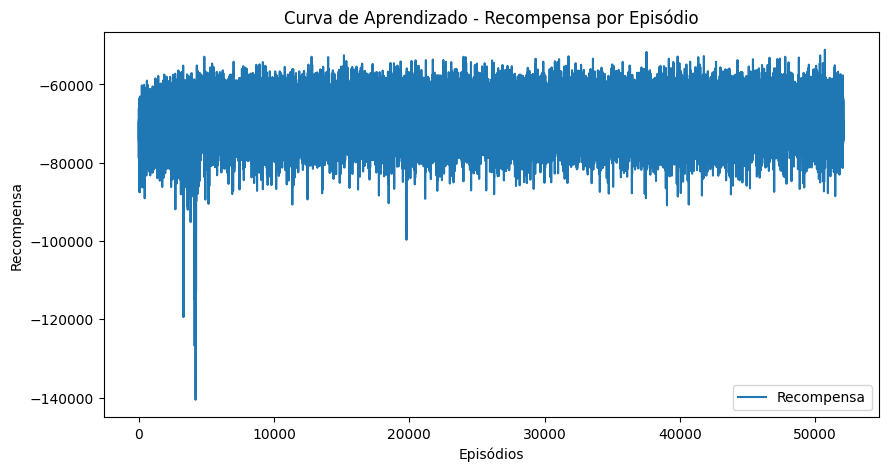

In [ ]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "data", "ppo_training", "obj_1", "complex_scenario_ant", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

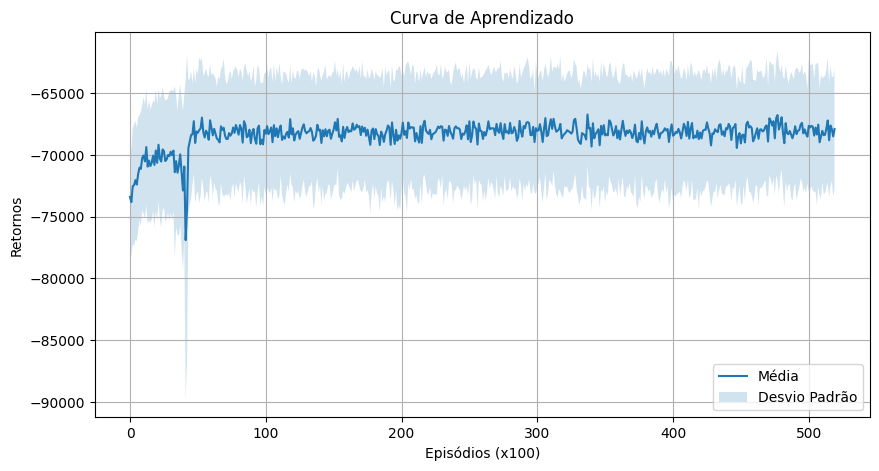

In [ ]:
# Calcular a média e o desvio padrão a cada mil episódios
media_100_episodios, desvio_100_episodios = calcular_estatisticas_por_janela(retornos, janela=100)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_100_episodios, desvio_100_episodios, episodios=100)

Apesar da grande variação mostrada pelo alto valor de desvio padrão, pode-se notar que o agente obteve aprendizado mesmo que mínimo.

O resultado supera o agente aleatório mas as heurísticas tem um resultado muito superior.

Os resultados das heurísticas (10 execuções):

---> Primeiro Motorista
- Média das somas das recompensas: -3129830.90
- Desvio Padrão: 193751.02
- Mediana: -3090405.00
- Moda: -3291672

---> Agente Randômico
- Média das somas das recompensas: -75036.40
- Desvio Padrão: 4325.14
- Mediana: -76516.50
- Moda: -76549

---> Motorista mais perto
- Média das somas das recompensas: -59897.60
- Desvio Padrão: 4616.16
- Mediana: -59302.50
- Moda: -55845

---> Motorista com menor custo (Expectativa de tempo de entrega)
- Média das somas das recompensas: -61525.00
- Desvio Padrão: 3373.58
- Mediana: -62907.00
- Moda: -64222

---> Modelo PPO treinado com 30 milhoões de passos
- Média das somas das recompensas: -67952.35
- Desvio Padrão: 4022.07
- Mediana: -68338.50
- Moda: -67962

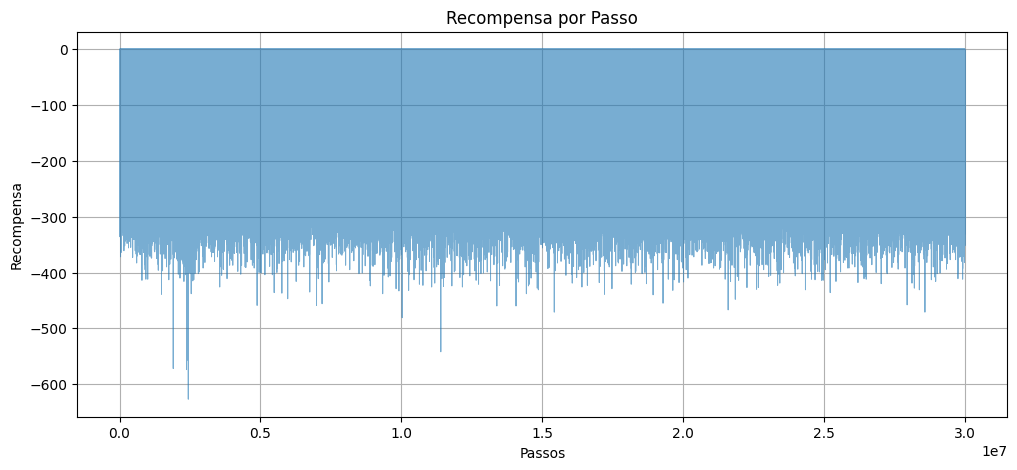

In [ ]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

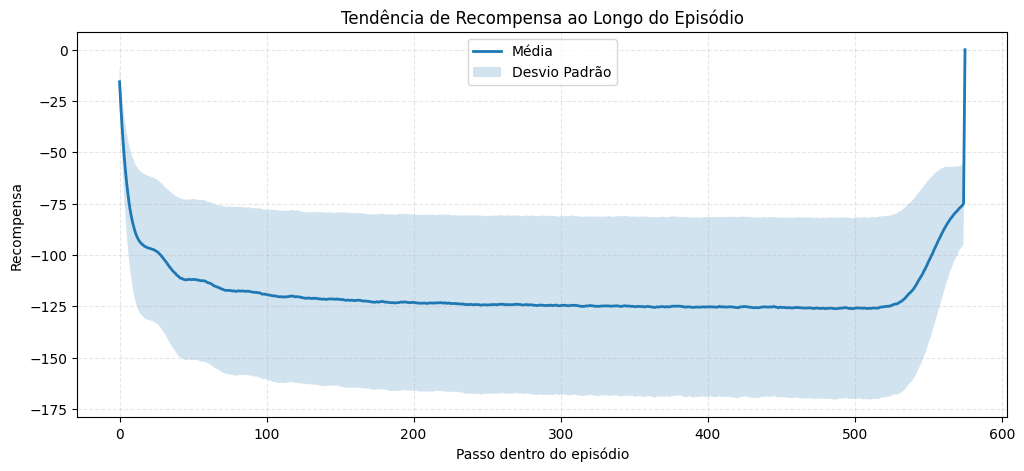

In [ ]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

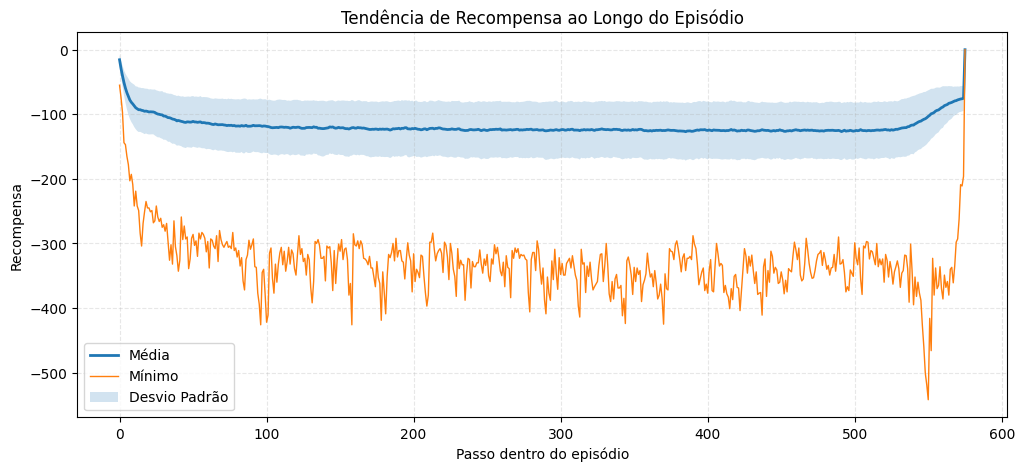

In [ ]:
mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 19000, 22000)
plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)

Acredito que as recompensas intermediárias fazem muita diferença no resultado final, elas dão mais feedback sobre como o agente está se saindo durante a simulação.

### **Objetivo 2: Minimizar o tempo de entrega dos motoristas a partir da expectativa de tempo gasto com a entrega - Recompensa Negativa ao final do episódio**

#### **Treinamento por 30 milhões de passos com Penalização de Truncamento comentada**

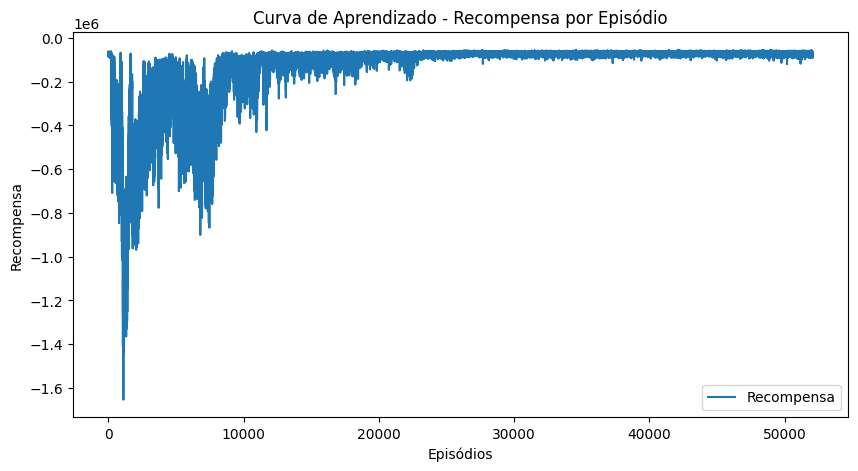

In [ ]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "data", "ppo_training", "obj_2", "complex_scenario_ant", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

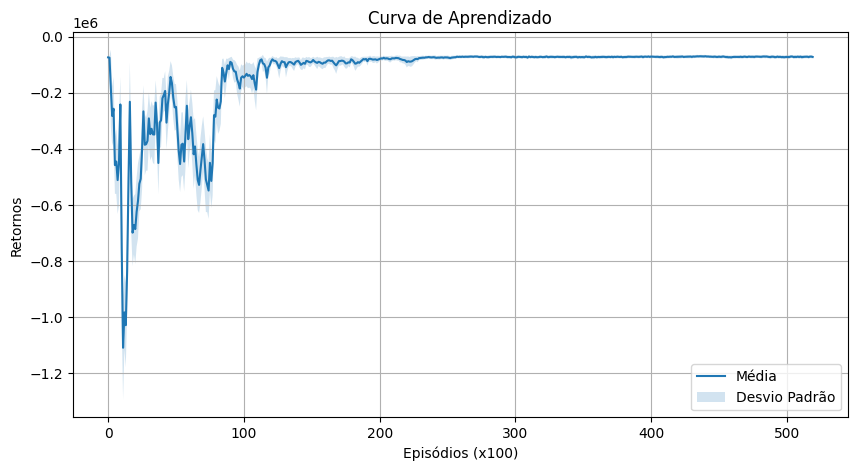

In [ ]:
# Calcular a média e o desvio padrão a cada mil episódios
media_100_episodios, desvio_100_episodios = calcular_estatisticas_por_janela(retornos, janela=100)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_100_episodios, desvio_100_episodios, episodios=100)

No gráfico acima parece que houve menos variação quanto ao desvio padrão porém o eixo y na verdade representa valores maiores. Dessa forma as recompensas continuam tendo um alto desvio padrão

Pode-se notar que o agente desaprendeu nos primeiros 3 mil episódios mas reaprendeu de volta. Porém resultado é bem pior que o agente aleatório.

Não consegui visualizar nenhum aprendizado após 23 mil episódios.

Os resultados das heurísticas (10 execuções):

---> Primeiro Motorista
- Média das somas das recompensas: -3154165.00
- Desvio Padrão: 115121.47
- Mediana: -3143870.50
- Moda: -3345967

---> Agente Randômico
- Média das somas das recompensas: -73108.20
- Desvio Padrão: 6630.67
- Mediana: -71861.00
- Moda: -78959

---> Motorista mais perto
- Média das somas das recompensas: -59140.30
- Desvio Padrão: 2843.51
- Mediana: -59068.50
- Moda: -59858

---> Motorista com menor custo (Expectativa de tempo de entrega)
- Média das somas das recompensas: -63225.80
- Desvio Padrão: 4209.02
- Mediana: -61903.50
- Moda: -64714

--> Modelo PPO treinado com 30 milhões de passos
- Média das somas das recompensas: -71943.65
- Desvio Padrão: 5100.31
- Mediana: -72597.00
- Moda: -80805

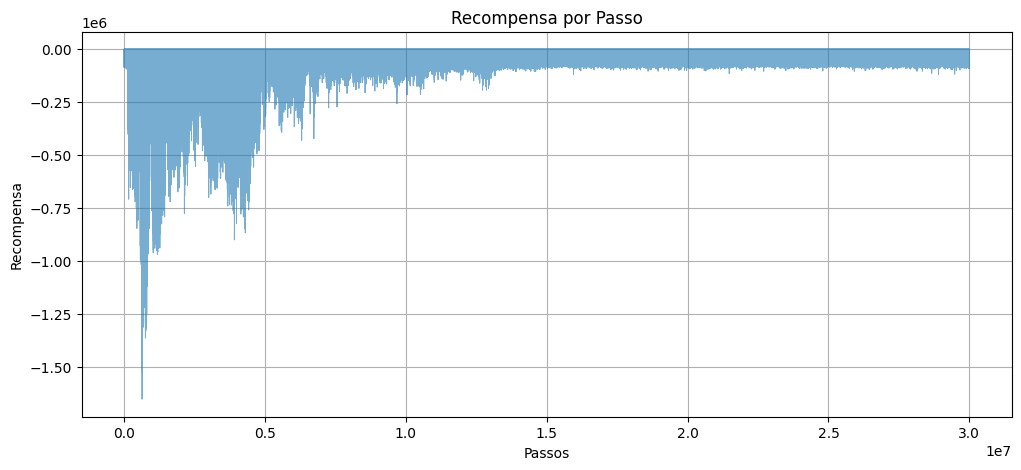

In [ ]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

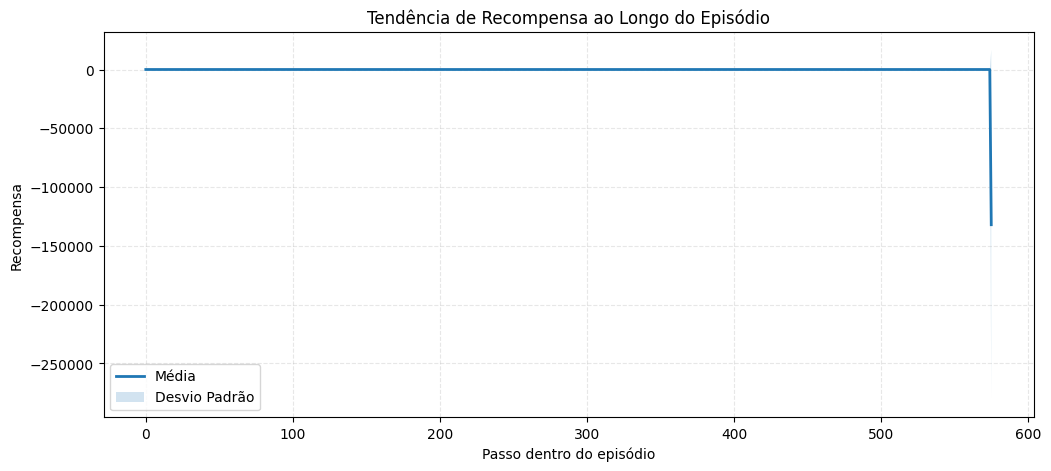

In [ ]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

Só existe recompensas finais ao longo do episódio!

In [ ]:
# mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 10500, 12000)
# plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)

### **Objetivo 3: Minimizar o tempo de entrega dos motoristas a partir do tempo efetivo gasto - Recompensa Negativa a cada passo**

#### **Treinamento por 30 milhões de passos com Penalização de Truncamento descomentada**

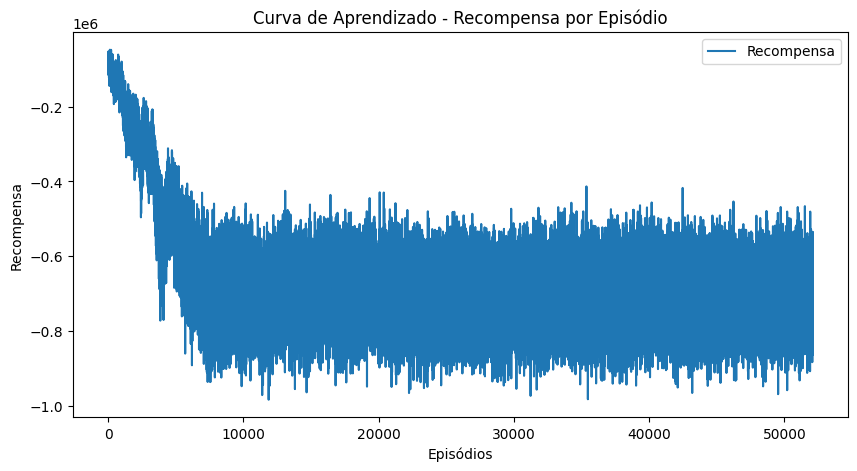

In [ ]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "data", "ppo_training", "obj_3", "complex_scenario", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

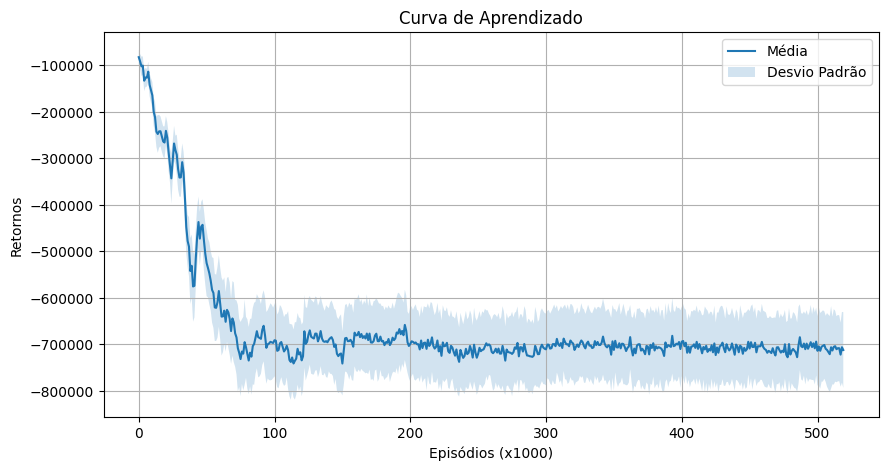

In [ ]:
# Calcular a média e o desvio padrão a cada mil episódios
media_100_episodios, desvio_100_episodios = calcular_estatisticas_por_janela(retornos, janela=100)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_100_episodios, desvio_100_episodios)

Nesse gráfico fica evidente que o agente "desaprendeu" pois simplesmente as somas das recompensas diminuiram e se mativeram até o final do treinamento.

É notório que o a heurística do Motorista de menor custo que usa a expectativa de tempo de entrega teve o melho resultado tempo de entrega efetivamente gasto:  -31.626,70 +- 7.218,63

Os resultados das heurísticas (10 execuções):

---> Primeiro Motorista
- Média das somas das recompensas: -1.906.260,30
- Desvio Padrão: 72.430,97
- Mediana: -1.922.030,50
- Moda: -2.006.592

---> Agente Randômico
- Média das somas das recompensas: -70.329,30
- Desvio Padrão: 14.396,17
- Mediana: -68.036,50
- Moda: -89.275

---> Motorista mais perto
- Média das somas das recompensas: -67.911,30
- Desvio Padrão: 22.303,92
- Mediana: -57.815,00
- Moda: -56.320

---> Motorista com menor custo (Expectativa de tempo de entrega)
- Média das somas das recompensas: -31.626,70
- Desvio Padrão: 7.218,63
- Mediana: -31.455,50
- Moda: -29.874

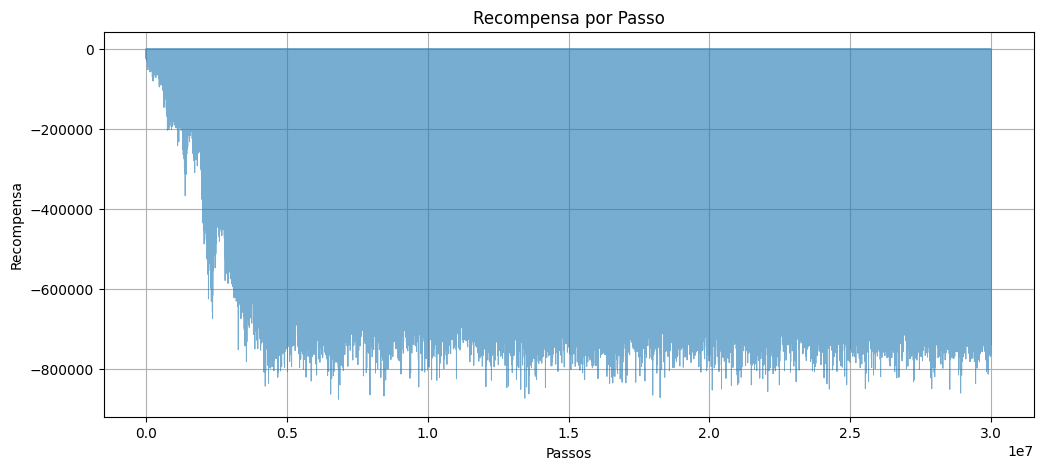

In [ ]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

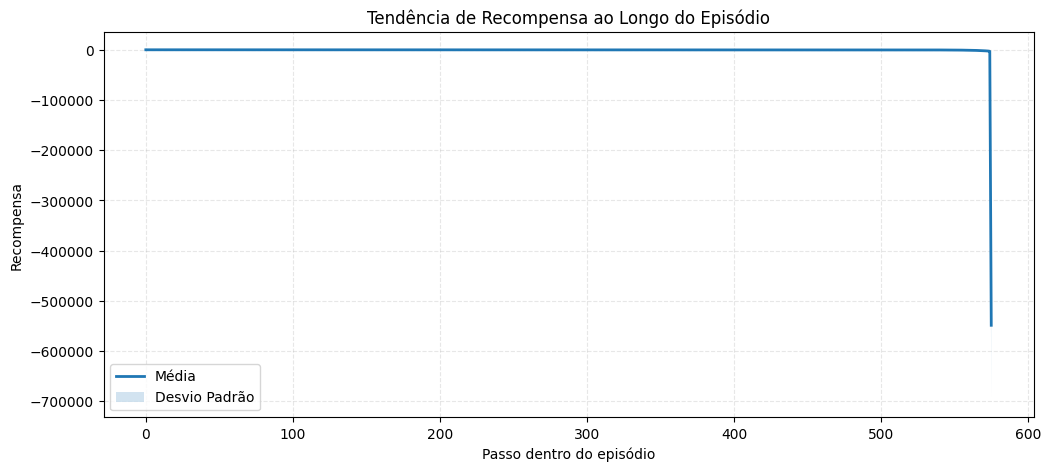

In [ ]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

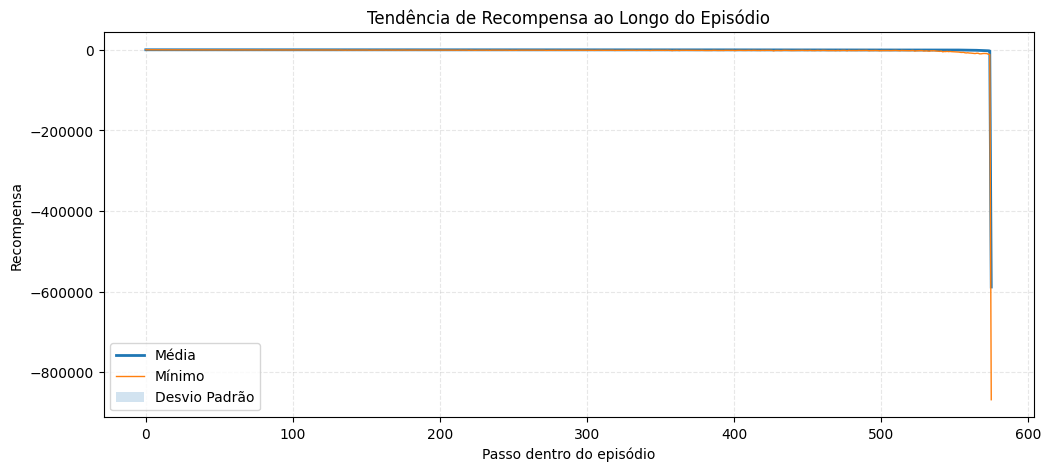

In [ ]:
mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 14000, 16000)
plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)

Apesar de ter recompensas a cada passo, elas são tão insignificantes comparada a recompensa final que não é possível observá-las no gráfico.

### **Objetivo 4: Minimizar o tempo de entrega dos motoristas a partir do tempo efetivo gasto - Recompensa Negativa ao final do episódio**

#### **Treinamento por 30 milhões de passos**

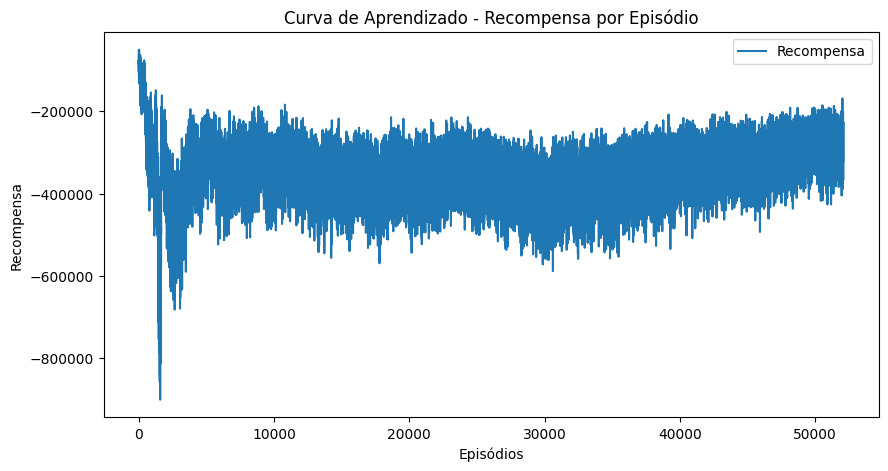

In [ ]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "data", "ppo_training", "obj_4", "complex_scenario", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

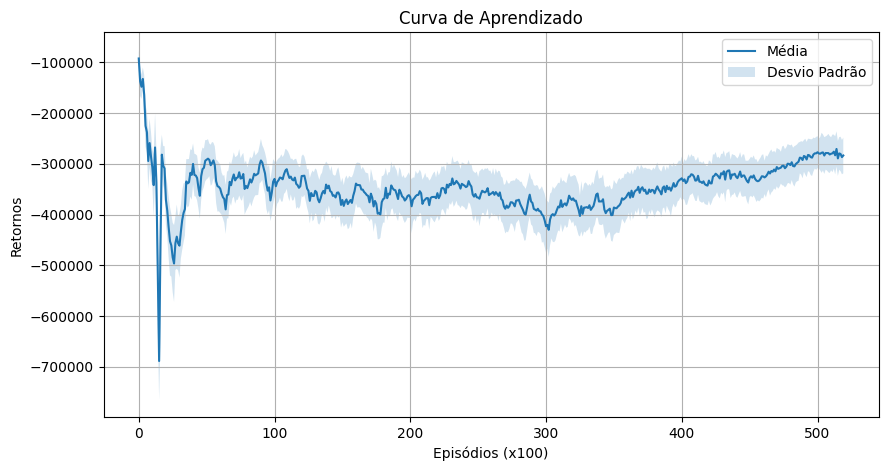

In [ ]:
# Calcular a média e o desvio padrão a cada mil episódios
media_100_episodios, desvio_100_episodios = calcular_estatisticas_por_janela(retornos, janela=100)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_100_episodios, desvio_100_episodios, episodios=100)

Neste gráfico também fica evidente que o agente "desaprendeu" pois as recompensas diminuiram até melhoraram ao longo dos episódios, mas não foi nem suficiente para voltar aos resultados iniciais.

Assim como no ojetivo 3 é notório que a heurística do Motorista de menor custo que usa a expectativa de tempo de entrega teve o melhor resultado de tempo de entrega efetivamente gasto:  -37.166,60 +- 10.742,14

Os resultados das heurísticas (10 execuções):

---> Primeiro Motorista
- Média das somas das recompensas: -2.180.437,80
- Desvio Padrão: 48.392,77
- Mediana: -2.190.873.00
- Moda: -2.262.973

---> Agente Randômico
- Média das somas das recompensas: -70.801,60
- Desvio Padrão: 10.703,66
- Mediana: -69.936,50
- Moda: -88.604

---> Motorista mais perto
- Média das somas das recompensas: -72.256,20
- Desvio Padrão: 19.945,13
- Mediana: -70.719,00
- Moda: -50.547

---> Motorista com menor custo (Expectativa de tempo de entrega)
- Média das somas das recompensas: -37.166,60
- Desvio Padrão: 10.742,14
- Mediana: -34.202,50
- Moda: -47.991

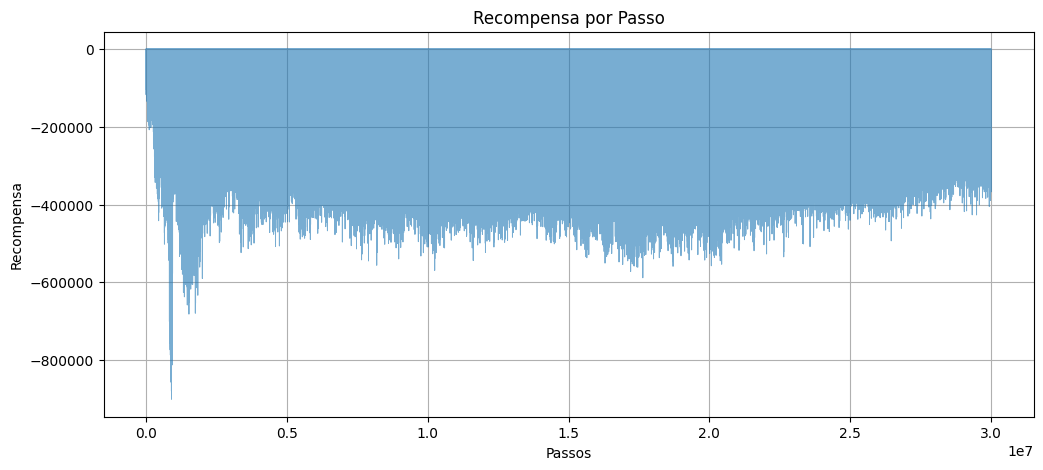

In [ ]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

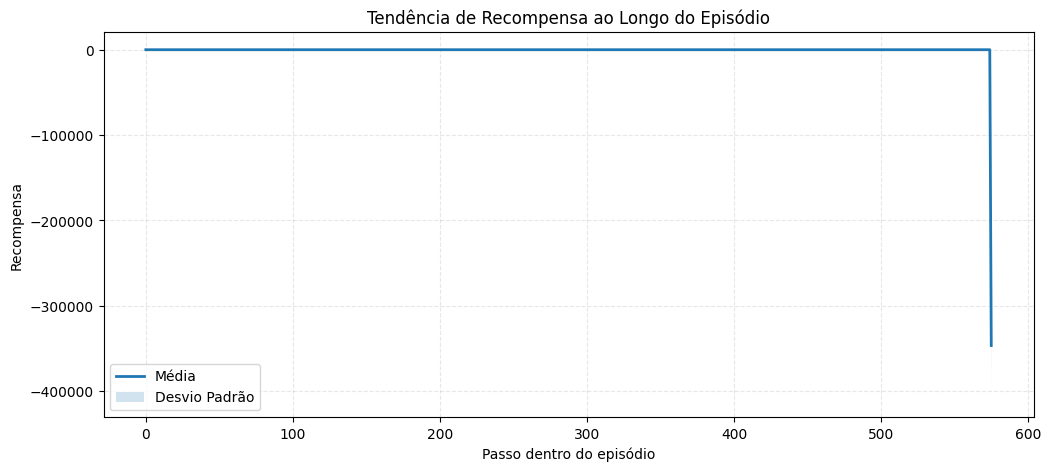

In [ ]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

Só existe recompensas finais ao longo do episódio!

In [ ]:
# mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 35000, 40000)
# plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)

### **Objetivo 5: Minimizar o tempo de entrega dos motoristas a partir do tempo efetivo gasto (Com penalização 5x para pedidos não coletados) - Recompensa negativa a cada passo**

#### **Treinamento por 30 milhões de passos**

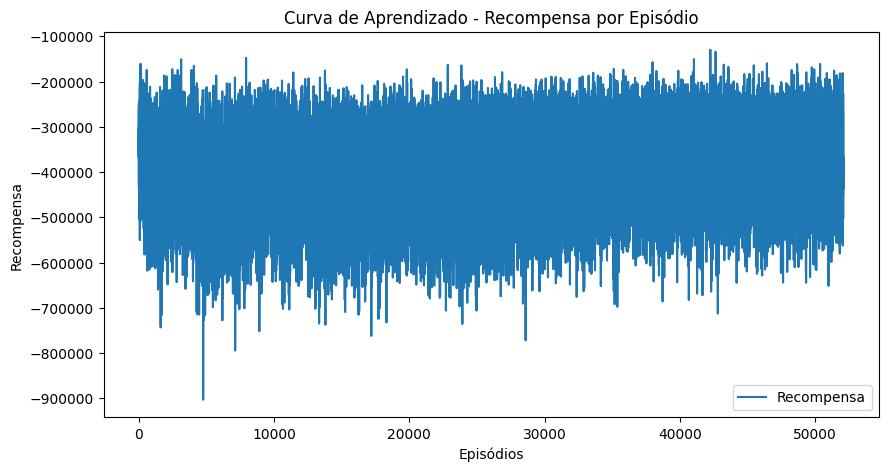

In [ ]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "data", "ppo_training", "obj_5", "complex_scenario", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

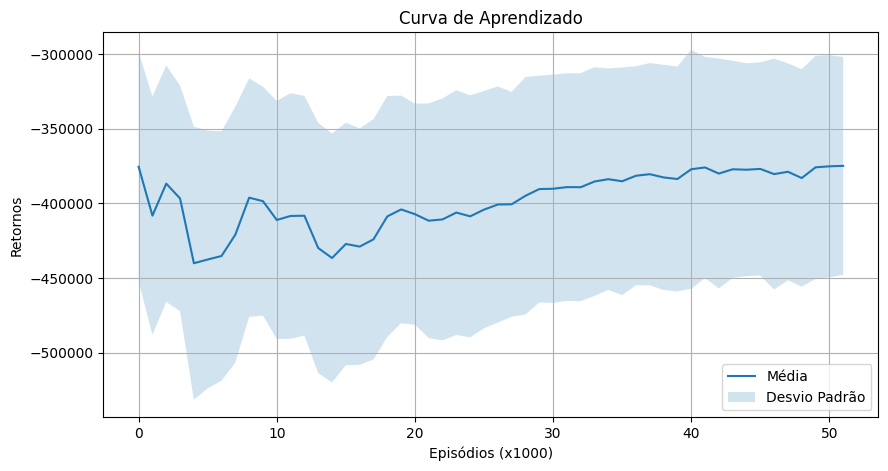

In [ ]:
# Calcular a média e o desvio padrão a cada mil episódios
media_1000_episodios, desvio_1000_episodios = calcular_estatisticas_por_janela(retornos, janela=1000)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_1000_episodios, desvio_1000_episodios)

Analisando o gráfico acima percebe-se que o agente não realizou aprendizado, o que condiz com os testes passados. Pelo menos ele não apresenta um "desaprendizado. Além disso, no final do treinamento da pra observar uma curva levezinha de aprendizado.

Assim como no ojetivo 3 e 4 é notório que a heurística do Motorista de menor custo que usa a expectativa de tempo de entrega teve o melhor resultado de tempo de entrega efetivamente gasto:  -152.800,80 +- 25.044,83

Os resultados das heurísticas (10 execuções):

---> Primeiro Motorista
- Média das somas das recompensas: -7.344.706,70
- Desvio Padrão: 470.206,78
- Mediana: -7.165.263,00
- Moda: -8.231.855

---> Agente Randômico
- Média das somas das recompensas: -320.962,20
- Desvio Padrão: 62.843,81
- Mediana: -317.487,00
- Moda: -383.364

---> Motorista mais perto
- Média das somas das recompensas: -306.450,50
- Desvio Padrão: 85.917,68
- Mediana: -315.701,50
- Moda: -203.735

---> Motorista com menor custo (Expectativa de tempo de entrega)
- Média das somas das recompensas: -152.800,80
- Desvio Padrão: 25.044,83
- Mediana: -159.917,50
- Moda: -166.715

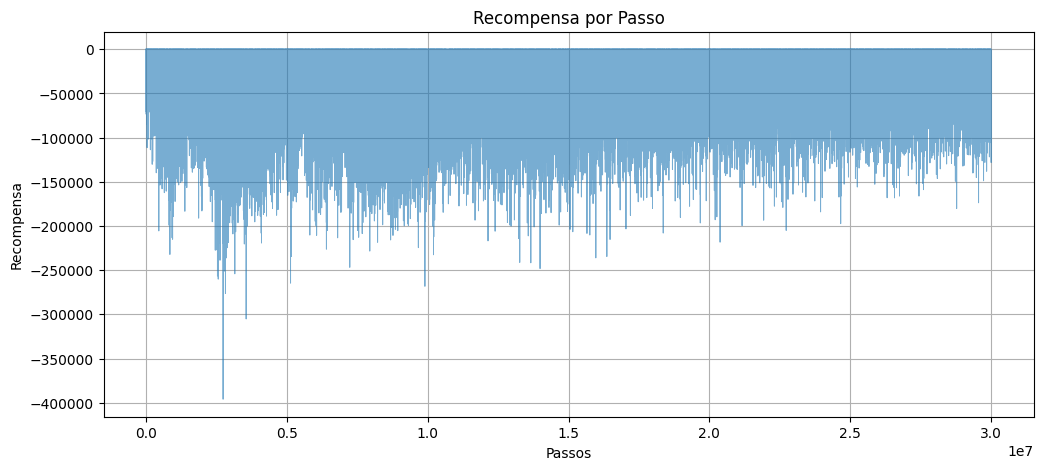

In [ ]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

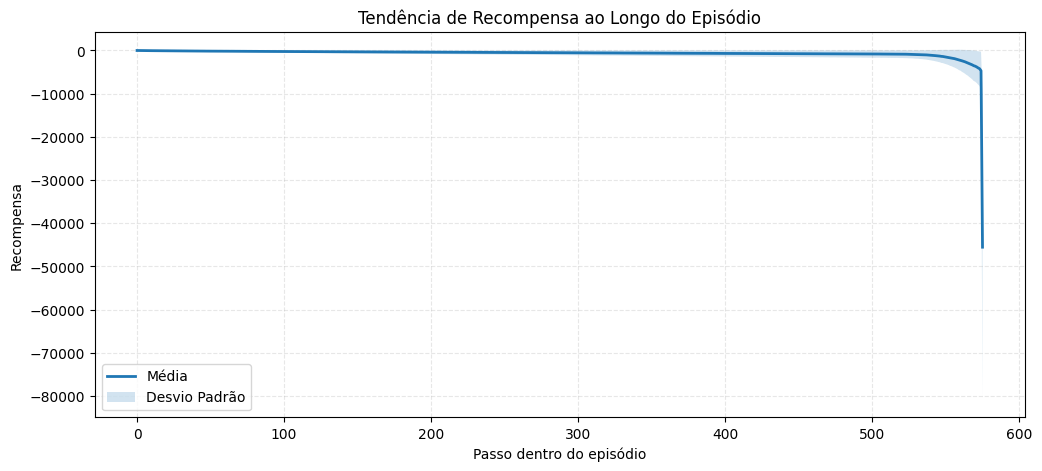

In [ ]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

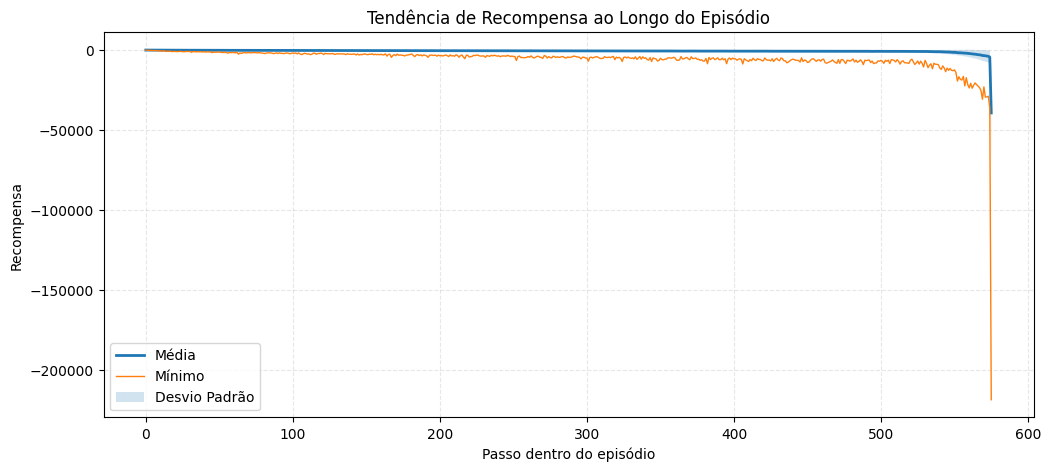

In [ ]:
mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 35000, 40000)
plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)

Nesse objetivo de ter recompensas a cada passo são insignificantes comparada a recompensa final, mas é evidente que elas evitam que o agente "desaprenda" ao dar um feedback ruim quando ele o agente cria muita fila em um motorista apenas.

### **Objetivo 6: Minimizar o tempo de entrega dos motoristas a partir do tempo efetivo gasto (Com penalização 5x para pedidos não coletados) - Recompensa negativa no fim do episódio**

#### **Treinamento por 30 milhões de passos**

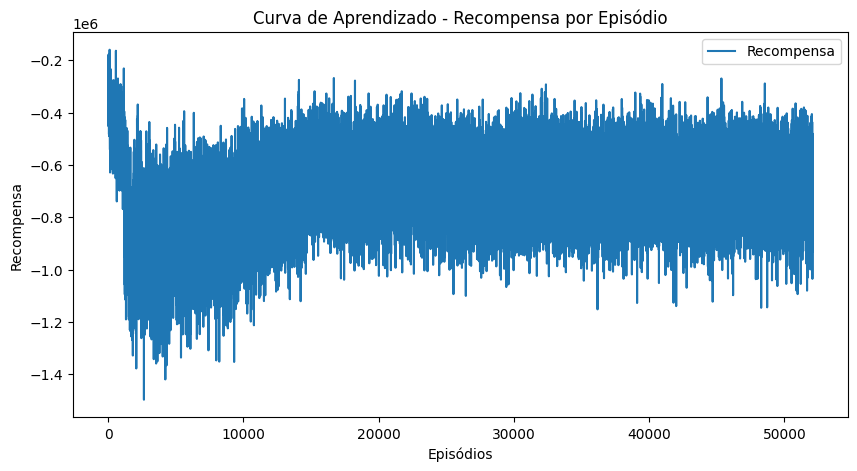

In [ ]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "data", "ppo_training", "obj_6", "complex_scenario", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

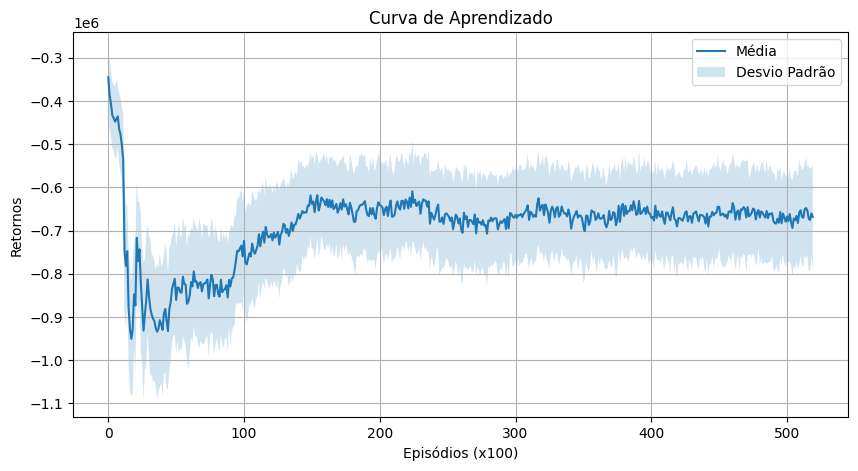

In [ ]:
# Calcular a média e o desvio padrão a cada mil episódios
media_100_episodios, desvio_100_episodios = calcular_estatisticas_por_janela(retornos, janela=100)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_100_episodios, desvio_100_episodios, episodios=100)

Analisando o gráfico acima percebe-se que ele se aproxima muito do objetivo passado (5) o agente não realizou aprendizado, o que condiz com os testes que realizamos no passado. Ele não apresenta um "desaprendizado". Além disso, percebe-se que a curva leve de aprendizado acontece mais cedo e se estabiliza.

Assim como no ojetivo 3, 4 e 5 é notório que a heurística do Motorista de menor custo que usa a expectativa de tempo de entrega teve o melhor resultado de tempo de entrega efetivamente gasto:  -151.495,50 +- 44.449,18

Os resultados das heurísticas (10 execuções):

---> Primeiro Motorista
- Média das somas das recompensas: -10.739.064,40
- Desvio Padrão: 307.295,14
- Mediana: -10.795.714,50
- Moda: -11.084.708

---> Agente Randômico
- Média das somas das recompensas: -355.896,40
- Desvio Padrão: 53.767,00
- Mediana: -365.404,50
- Moda: -426.010

---> Motorista mais perto
- Média das somas das recompensas: -293.330,10
- Desvio Padrão: 61.887,64
- Mediana: -286.175,00
- Moda: -187.496

---> Motorista com menor custo (Expectativa de tempo de entrega)
- Média das somas das recompensas: -151.495,50
- Desvio Padrão: 44.449,18
- Mediana: -134.803,50
- Moda: -199.770

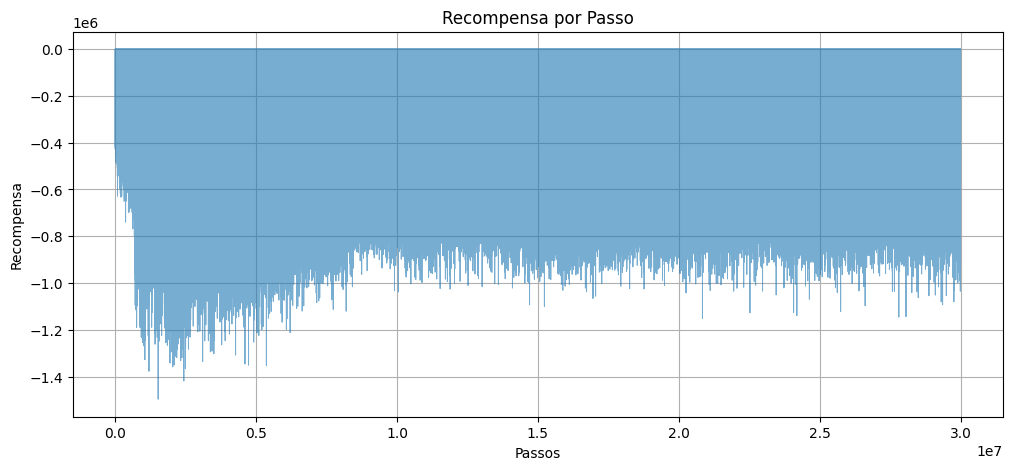

In [ ]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

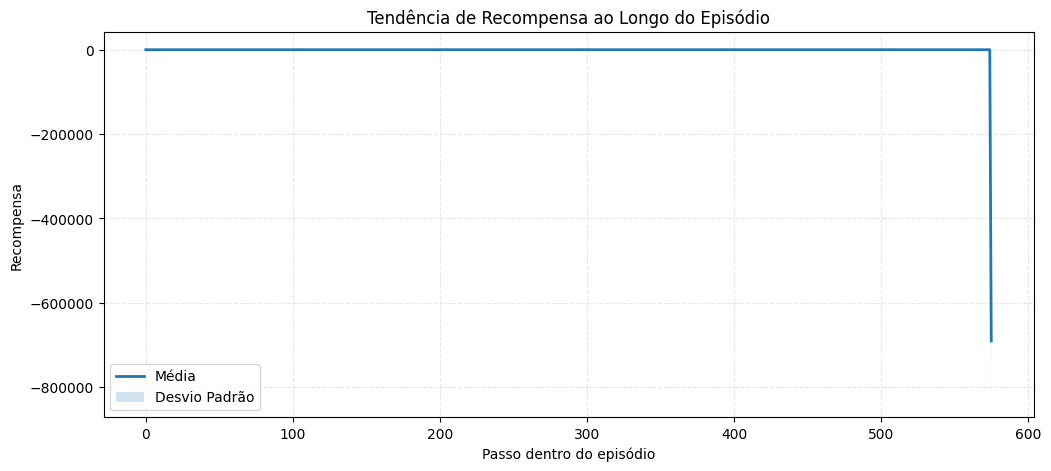

In [ ]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

Só existe recompensas finais ao longo do episódio!

In [ ]:
# mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 19000, 21000)
# plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)

### **Objetivo 7: Minimizar o custo de operação a partir da distância efetiva - Recompensa negativa a cada passo**

#### **Treinamento por 30 milhões de passos**

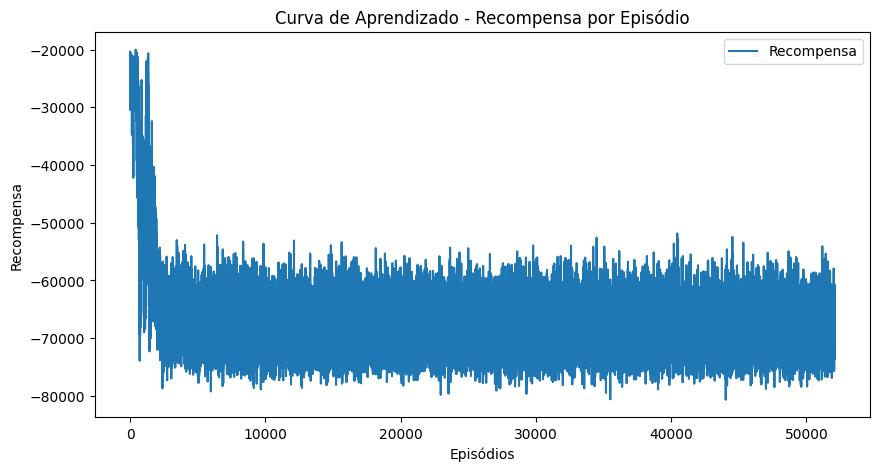

In [ ]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "data", "ppo_training", "obj_7", "complex_scenario", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

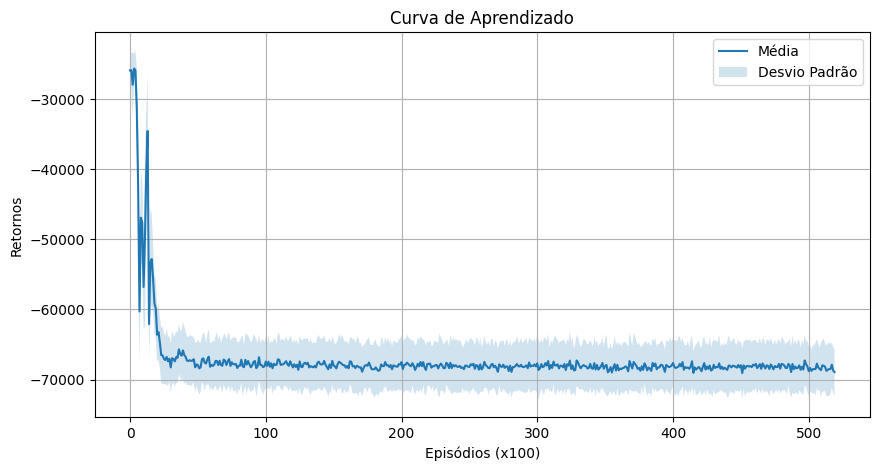

In [ ]:
# Calcular a média e o desvio padrão a cada mil episódios
media_100_episodios, desvio_100_episodios = calcular_estatisticas_por_janela(retornos, janela=100)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_100_episodios, desvio_100_episodios, episodios=100)

Nesse gráfico, assim como no gráfico no objetivo 3, fica evidente que o agente "desaprendeu" pois simplesmente as somas das recompensas diminuiram e se mativeram até o final do treinamento.

Nesse objetivo o agente do Motorista mais perto já é bem melhor para resolver o problema: -18.950,20 +- 1.250,66

Os resultados das heurísticas (10 execuções):

---> Primeiro Motorista
- Média das somas das recompensas: -70.323,90
- Desvio Padrão: 3.150,43
- Mediana: -70.919,50
- Moda: -74.875

---> Agente Randômico
- Média das somas das recompensas: -25.436,10
- Desvio Padrão: 2.159,02
- Mediana: -26.213,50
- Moda: -25.645

---> Motorista mais perto
- Média das somas das recompensas: -18.950,20
- Desvio Padrão: 1.250,66
- Mediana: -18.544,50
- Moda: -18.634

---> Motorista com menor custo (Distância a ser percorrida)
- Média das somas das recompensas: -21.103,10
- Desvio Padrão: 1.314,76
- Mediana: -21.366,00
- Moda: -19.007

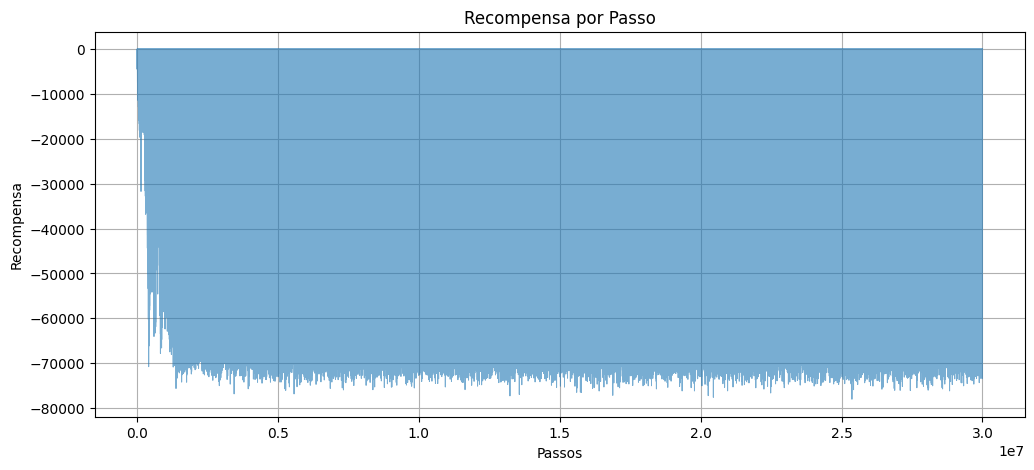

In [ ]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

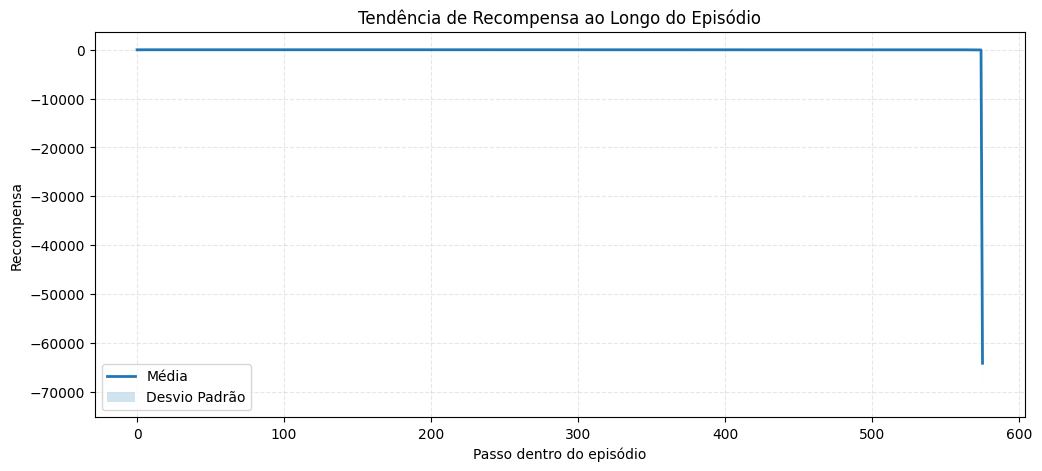

In [ ]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

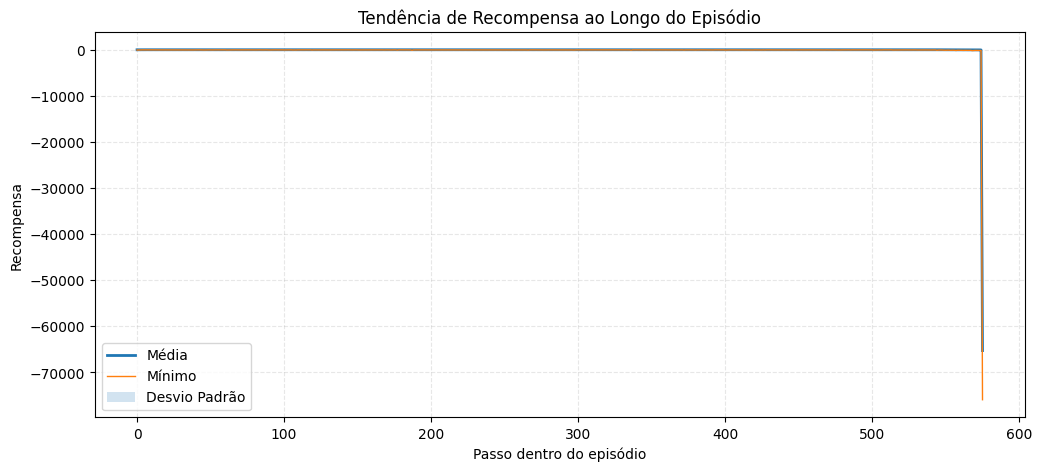

In [ ]:
mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 19000, 21000)
plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)

Assim como no objetivo 3, apesar de ter recompensas a cada passo, elas são tão insignificantes comparada a recompensa final que não é possível observá-las no gráfico.

### **Objetivo 8: Minimizar o custo de operação a partir da distância efetiva - Recompensa negativa ao final do episódio**

#### **Treinamento por 30 milhões de passos**

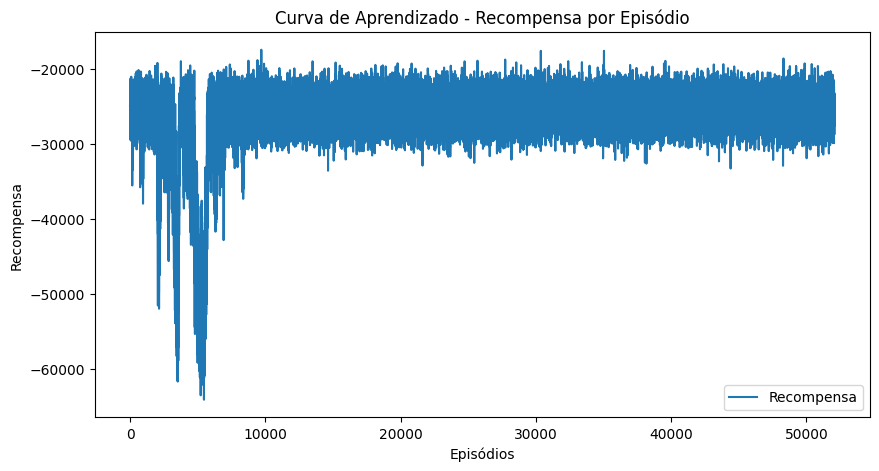

In [ ]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "data", "ppo_training", "obj_8", "complex_scenario", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

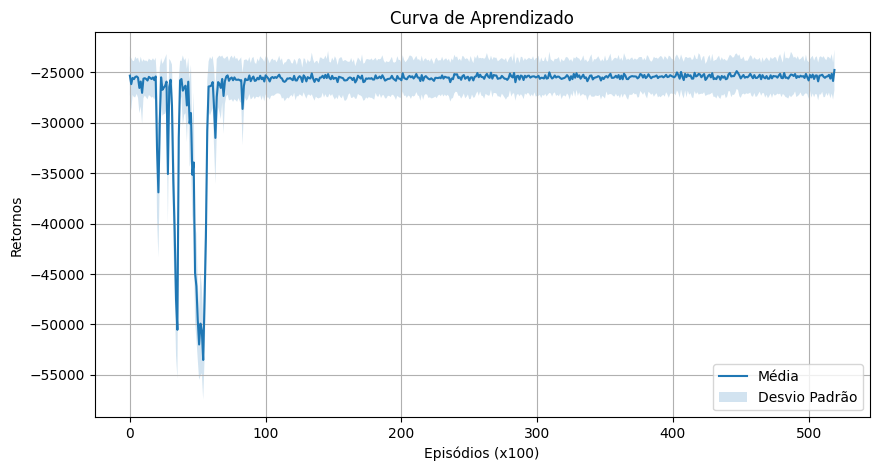

In [ ]:
# Calcular a média e o desvio padrão a cada mil episódios
media_100_episodios, desvio_100_episodios = calcular_estatisticas_por_janela(retornos, janela=100)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_100_episodios, desvio_100_episodios, episodios=100)

No gráfico acima pode-se notar que o agente "desaprendeu" nos primeiros 50 mil episódios, mas rapidamente reaprendeu de volta. Porém resultado é bem pior que o agente aleatório.

Não consegui visualizar nenhum aprendizado após 7.500 episódios.

Os resultados das heurísticas (10 execuções):

---> Primeiro Motorista
- Média das somas das recompensas: -66.984,00
- Desvio Padrão: 4.209,58
- Mediana: -66.596,50
- Moda: -73.593

---> Agente Randômico
- Média das somas das recompensas: -25.951,40
- Desvio Padrão: 1.297,68
- Mediana: -25.332,00
- Moda: -25.332

---> Motorista mais perto
- Média das somas das recompensas: -19.173,90
- Desvio Padrão: 1.250,43
- Mediana: -19.496,50
- Moda: -18.909

---> Motorista com menor custo (Distância a ser percorrida)
- Média das somas das recompensas: -20.787,10
- Desvio Padrão: 1.921,28
- Mediana: -20.936,50
- Moda: -19.971

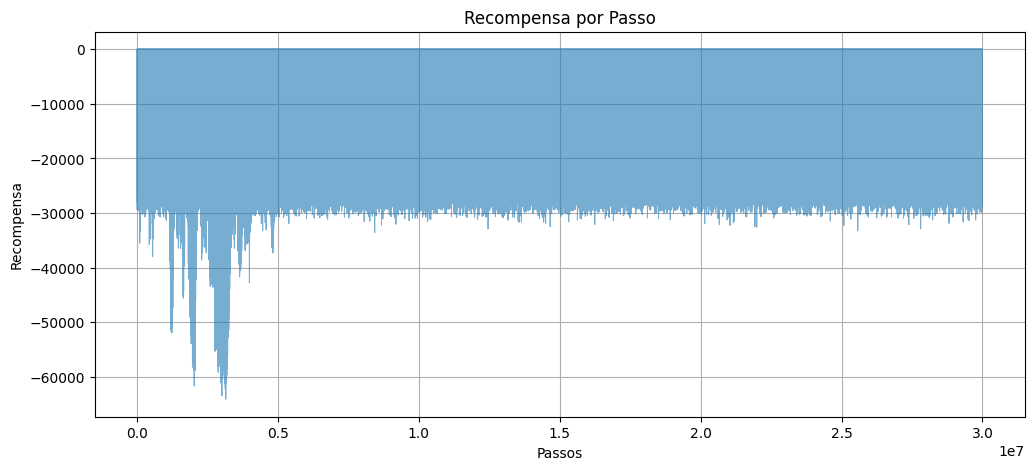

In [ ]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

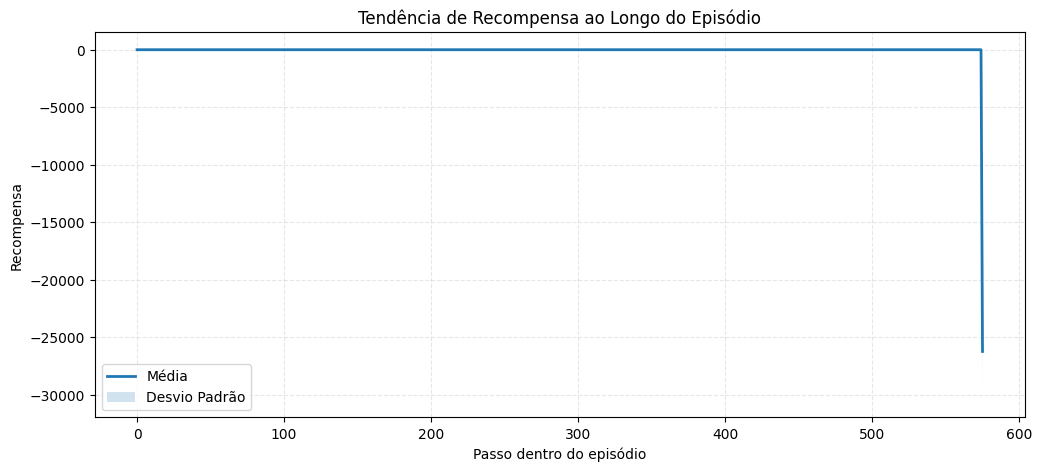

In [ ]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

Só existe recompensas finais ao longo do episódio!

In [ ]:
# mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 19000, 21000)
# plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)

### **Objetivo 9: Minimizar o custo de operação a partir da distância a ser percorrida - Recompensa negativa a cada passo**

#### **Treinamento por 30 milhões de passos**

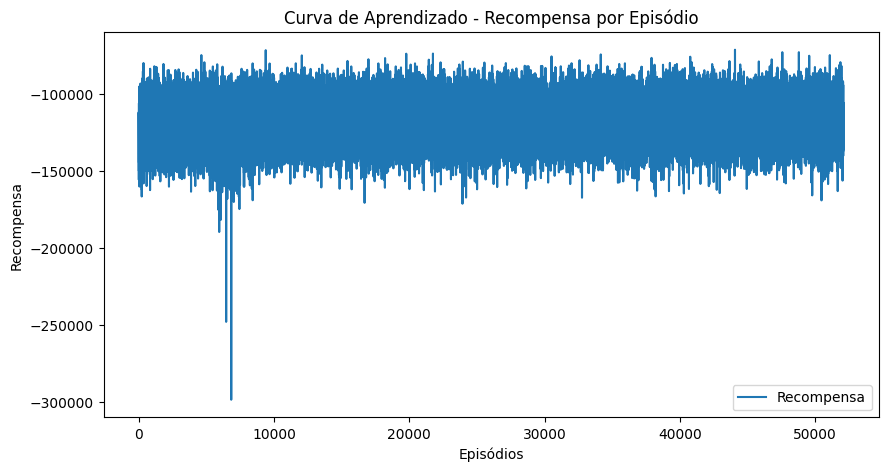

In [ ]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "data", "ppo_training", "obj_9", "complex_scenario", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

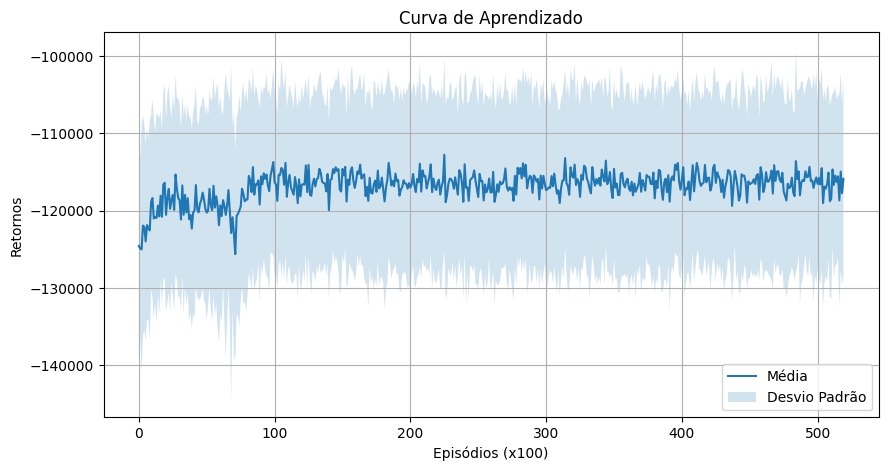

In [ ]:
# Calcular a média e o desvio padrão a cada mil episódios
media_100_episodios, desvio_100_episodios = calcular_estatisticas_por_janela(retornos, janela=100)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_100_episodios, desvio_100_episodios, episodios=100)

Apesar da grande variação mostrada pelo alto valor de desvio padrão, pode-se notar que o agente obteve aprendizado mesmo que mínimo.

O resultado supera o agente aleatório mas as heurísticas tem um resultado muito superior.

Os resultados das heurísticas (10 execuções):

---> Primeiro Motorista
- Média das somas das recompensas: -5.085.001,80
- Desvio Padrão: 285.156,22
- Mediana: -5.052.253,50
- Moda: -5.268,408

---> Agente Randômico
- Média das somas das recompensas: -120.489,00
- Desvio Padrão: 13.862,47
- Mediana: -116.672,00
- Moda: -145.238

---> Motorista mais perto
- Média das somas das recompensas: -69.575,70
- Desvio Padrão: 10.558,18
- Mediana: -71.642,50
- Moda: -73.139

---> Motorista com menor custo (Distância a ser percorrida)
- Média das somas das recompensas: -75.150,00
- Desvio Padrão: 13.436,88
- Mediana: -76.758,50
- Moda: -78.112

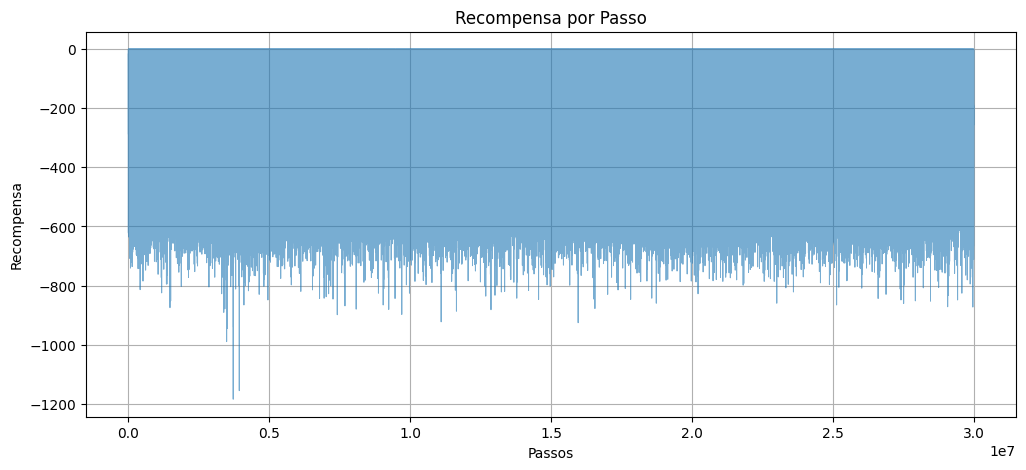

In [ ]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

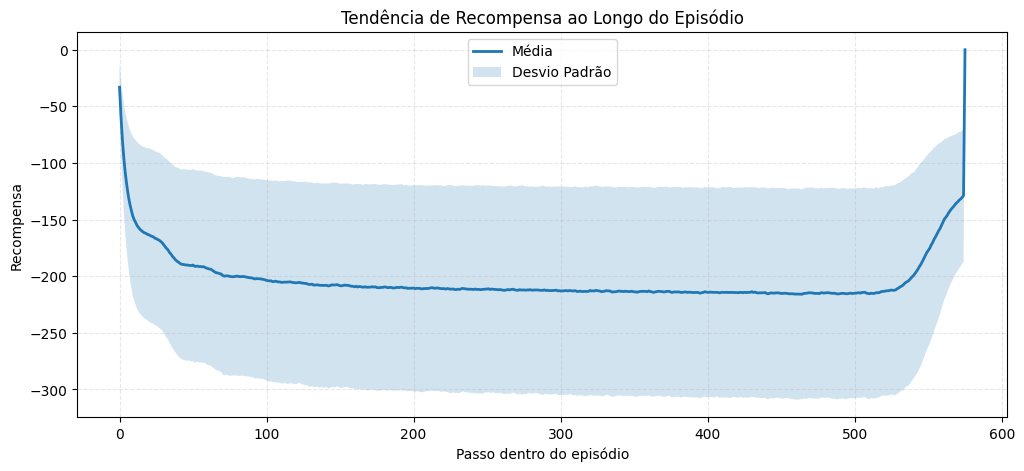

In [ ]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

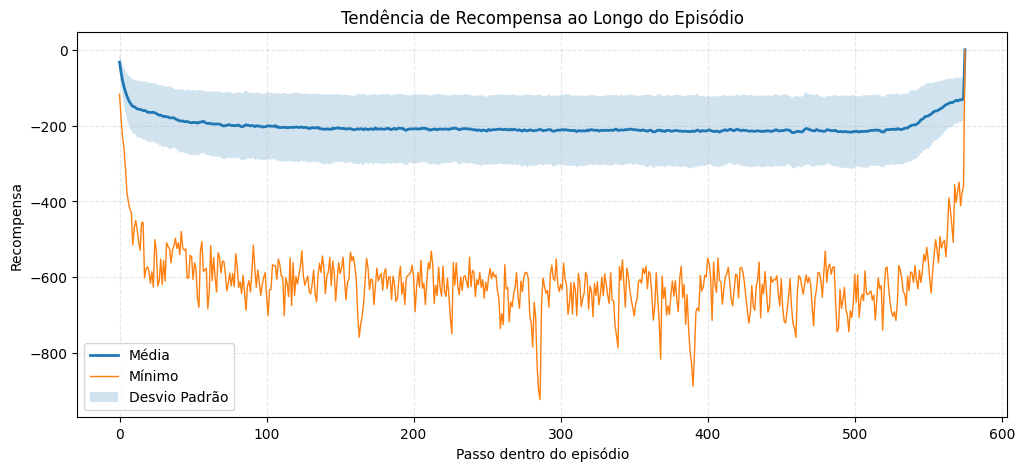

In [ ]:
mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 19000, 21000)
plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)

Acredito que as recompensas intermediárias fazem muita diferença no resultado final, elas dão mais feedback sobre como o agente está se saindo durante a simulação.

### **Objetivo 10: Minimizar o custo de operação a partir da distância a ser percorrida - Recompensa negativa ao final do episódio**

#### **Treinamento por 30 milhões de passos**

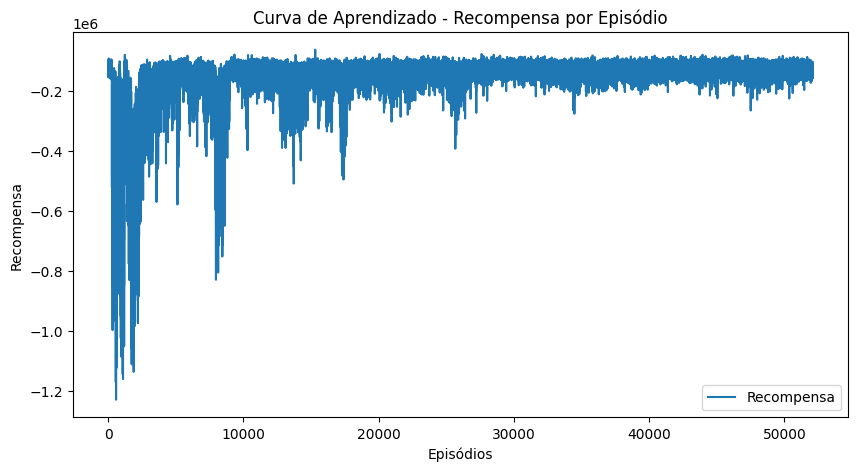

In [ ]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "data", "ppo_training", "obj_10", "complex_scenario", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

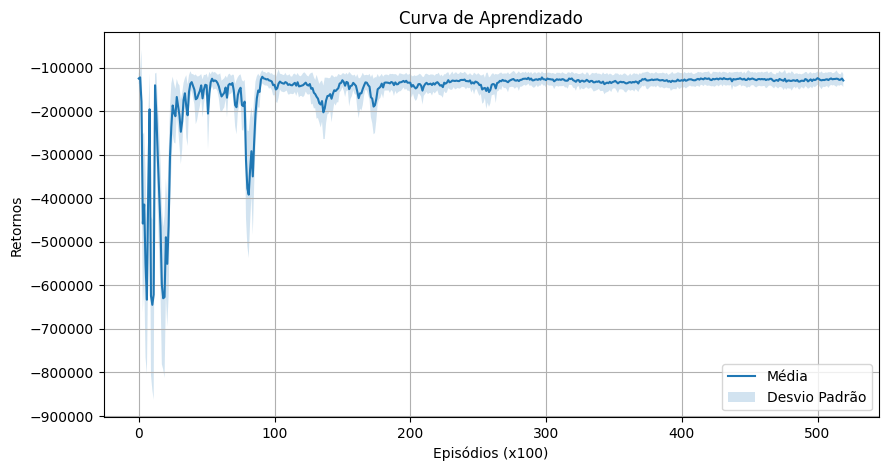

In [ ]:
# Calcular a média e o desvio padrão a cada mil episódios
media_100_episodios, desvio_100_episodios = calcular_estatisticas_por_janela(retornos, janela=100)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_100_episodios, desvio_100_episodios, episodios=100)

No gráfico acima pode-se notar que o agente "desaprendeu" nos primeiros 30 mil episódios, mas rapidamente reaprendeu de volta. 

O resultado das recompensas se assemelha muito ao agente aleatório.

Não consegui visualizar nenhum aprendizado após 9 mil episódios.

Os resultados das heurísticas (10 execuções):

---> Primeiro Motorista
- Média das somas das recompensas: -5322961.30
- Desvio Padrão: 414335.83
- Mediana: -5560874.50
- Moda: -5639776

---> Agente Randômico
- Média das somas das recompensas: -126716.60
- Desvio Padrão: 18044.11
- Mediana: -126142.50
- Moda: -131154

---> Motorista mais perto
- Média das somas das recompensas: -79935.30
- Desvio Padrão: 12435.90
- Mediana: -79144.50
- Moda: -73262

---> Motorista com menor custo (Distância a ser percorrida)
- Média das somas das recompensas: -80386.40
- Desvio Padrão: 13273.63
- Mediana: -81081.50
- Moda: -77277

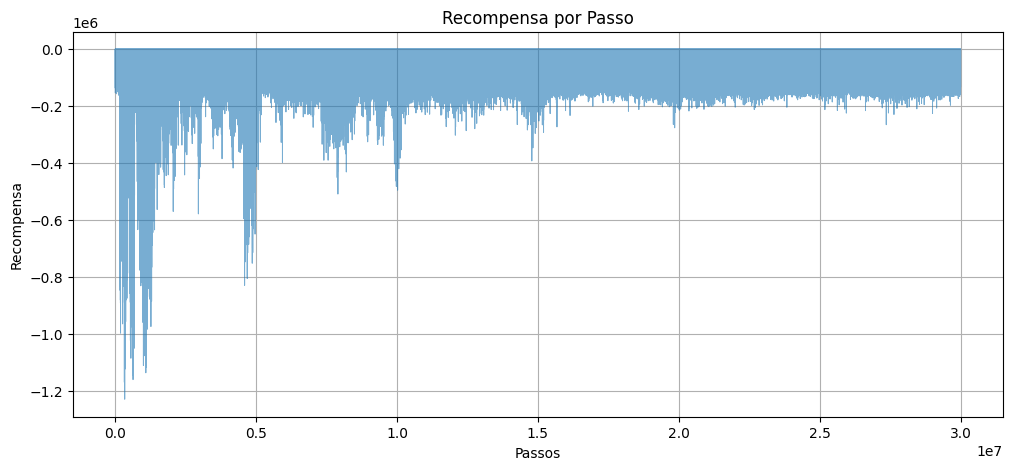

In [ ]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

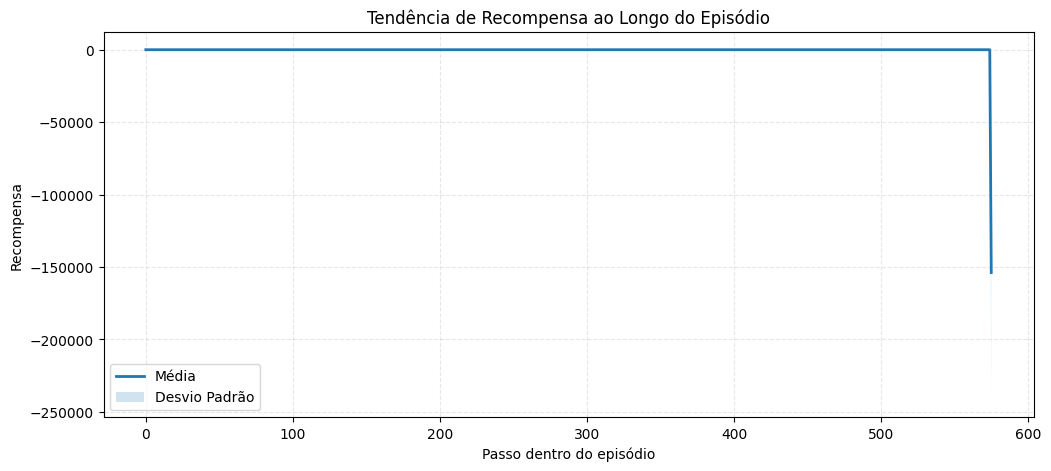

In [ ]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

Só existe recompensas finais ao longo do episódio!

In [ ]:
# mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 19000, 21000)
# plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)